# Project Overview: Urban Soils

##### Kerry Mundy 

Just prior to 2021, New York City Urban Soils were characterized and sampled with the USDA NRCS team. The goal of collecting samples, with various field methods, was to better understand and catalog urban sustainability and resiliency. Urban soils are facing many challenges with increasing impacts on water quality, flooding, solid waste disposal, etc. Urban soils are poorly understood and mapped; therefore, there is a need to learn the dynamic properties, quality, land uses, and ecosystem functions of soils with an increasing worldwide shift of those living in/moving to urban regions. 

## Our Focus

One part of this project is to solely focus on hydraulic properties. Unsaturated hydraulic conductivity (Kunsat) (ease at which water flows through the soil) or near-saturated hydraulic conductivity is recorded using tension base infiltrometers. This instrument releases water onto the soil surface at various negative tensions (potentials). This will allow us to understand the flow of water into the soil matrix and exclude influences by macropores.  The loss of water through the core samples is then collected on a balance to log the mass every minute. 'H' is set to -15, -10, and -5 cm for this experiment and Kunsat is measured in cm/d. The parameters are relationships between site location (soil type), depth, and Kunsat.

### I. Importing Packages

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy
import random

### II. Load First Data File

In [103]:
df = pd.read_csv('NRCS _Kunsat_Data_File.csv')
df.head(10)

,SITE_NAME,ID,REPLICATE,DEPTH_CM,DEPTH_RANGE,-15_KUNSAT,-10_KUNSAT,-5_KUNSAT
0,Arden Woods,AW,a,1,1-5,0.37,0.42,0.65
1,Arden Woods,AW,a,5,5-25,0.05,0.21,1.13
2,Arden Woods,AW,a,25,25-39,0.16,0.08,0.05
3,Arden Woods,AW,a,39,39-56,0.08,0.06,0.04
4,Arden Woods,AW,a,56,56-106,0.03,0.04,0.06
5,Arden Woods,AW,b,1,1-5,0.11,0.13,0.36
6,Arden Woods,AW,b,5,5-25,0.03,0.03,0.04
7,Arden Woods,AW,b,25,25-39,0.02,0.03,0.02
8,Arden Woods,AW,b,39,39-56,0.06,0.04,0.03
9,Arden Woods,AW,b,56,56-106,0.02,0.02,0.02


### III. Inspect Data 

#### a. Here we can checkout the unique values of sites, replicates, and depth ranges to better understand what we are working with 

In [6]:
df['SITE_NAME'].unique()

array(['Arden Woods', 'Inwood Hill', 'Blue Heron', 'FB Floyd Bennett',
       'JR Floyd Bennett', 'CF Floyd Bennett', 'Greenwood Cemetery',
       'Greenbelt Recreation Center', 'Van Cortlandt', 'Soundview Park',
       'Corporate Woods', 'Flushing Meadows'], dtype=object)

In [7]:
df['REPLICATE'].unique()

array(['a', 'b', 'c'], dtype=object)

In [8]:
df['DEPTH_RANGE'].unique()

array(['1-5', '5-25', '25-39', '39-56', '56-106', '5-35', '35-59',
       '59-85', '85-105', '105-120', '0-11', '11-26', '26-47', '47-65',
       '65-83', '0-14', '14-44', '44-57', '57-67', '67-88', '0-20',
       '20-43', '43-49', '49-80', '80-117', '0-13', '13-19', '19-34',
       '34-44', '44-86', '13-28', '43-63', '63-77', '104-117', '0-25',
       '25-42', '42-71', '71-91', '91-130', '0-6', '6-16', '16-28',
       '28-54', '54-67', '67-102', '0-17', '17-50', '50-67', '67-94',
       '94-104', '0-12', '12-19', '19-33', '33-101'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SITE_NAME    169 non-null    object 
 1   ID           169 non-null    object 
 2   REPLICATE    169 non-null    object 
 3   DEPTH_CM     169 non-null    int64  
 4   DEPTH_RANGE  169 non-null    object 
 5   -15_KUNSAT   162 non-null    float64
 6   -10_KUNSAT   162 non-null    float64
 7   -5_KUNSAT    161 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.7+ KB


#### b. We can also count how many samples were taken from each site 

In [9]:
n_samples = df.groupby('SITE_NAME')
n_samples.REPLICATE.count()

SITE_NAME
Arden Woods                    15
Blue Heron                     15
CF Floyd Bennett               15
Corporate Woods                12
FB Floyd Bennett               15
Flushing Meadows                1
Greenbelt Recreation Center    15
Greenwood Cemetery             15
Inwood Hill                    18
JR Floyd Bennett               15
Soundview Park                 15
Van Cortlandt                  18
Name: REPLICATE, dtype: int64

#### c. We can break this down further to see samples per replicate per site

In [10]:
sample_profile= df.groupby(['SITE_NAME', 'REPLICATE'])['SITE_NAME'].count()
sample_profile

SITE_NAME                    REPLICATE
Arden Woods                  a            5
                             b            5
                             c            5
Blue Heron                   a            5
                             b            5
                             c            5
CF Floyd Bennett             a            5
                             b            5
                             c            5
Corporate Woods              a            4
                             b            4
                             c            4
FB Floyd Bennett             a            5
                             b            5
                             c            5
Flushing Meadows             a            1
Greenbelt Recreation Center  a            5
                             b            5
                             c            5
Greenwood Cemetery           a            5
                             b            5
                             c       

### IV. Spatially Plotting the Location of Each Site Using Cartopy

#### a. Importing packages and csv file with locations of each site 

In [11]:
locations = pd.read_csv('NRCS_Site_Locations.csv')
locations.head(10)

,SITE_NAME,lat,lon
0,Inwood Hill State Park,40.877216,-73.925809
1,Blue Heron Park,40.531600,-74.175462
2,Corporate Park Woods,40.621050,-74.169925
3,Van Cortlandt Park,40.897387,-73.886159
4,Soundview Park,40.817335,-73.875076
5,Flushing Meadows Corona Park,40.740182,-73.840706
6,Greenbelt Recreation Center,40.766797,-74.172359
7,Green-Wood Cemetery,40.668748,-73.993171
8,Arden Woods,40.665195,-74.191951
9,Floyd Bennett Field,40.591148,-73.890598


#### b. Setting the map extent to focus on New York/New Jersey Region 

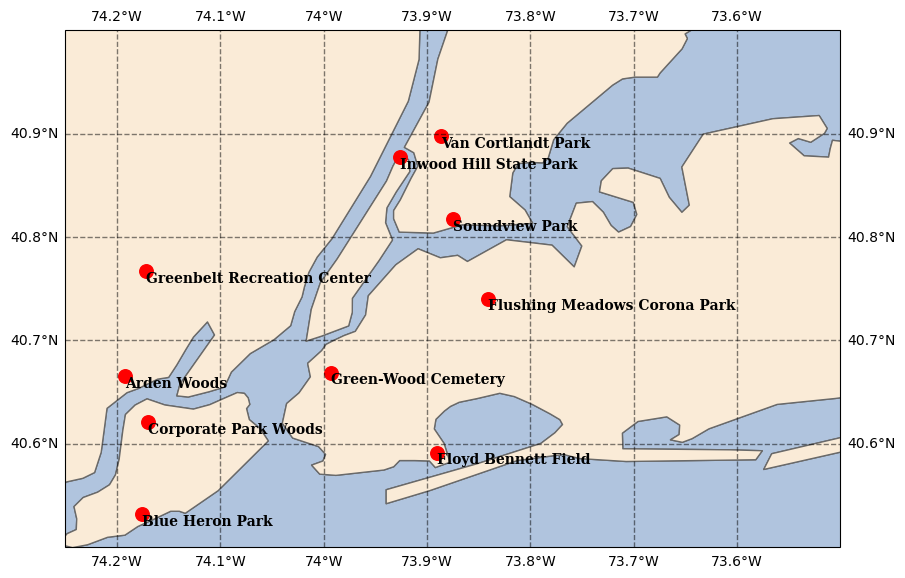

In [145]:
NY_map =ccrs.PlateCarree()
lonW = -74.25
lonE = -73.5
latS = 41
latN = 40.5

names = locations['SITE_NAME']
x = locations.lon
y = locations.lat

plt.figure(figsize=(10, 7))
ax = plt.axes(projection=NY_map)
plt.scatter(x, y, color='red', marker='o', s=95) 

## This loop will give us a name for each site based on coordinates as it iterates through the data
for i in range(len(names)):
    plt.text(x[i], y[i], names[i], va="top", family='serif', weight="bold", color='black')
ax.set_extent([lonW, lonE, latS, latN], crs=NY_map)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightsteelblue', edgecolor='dimgrey')
ax.add_feature(cartopy.feature.LAND, facecolor='antiquewhite', edgecolor='dimgrey')
ax.gridlines (draw_labels=True, linewidth = 1, color = 'black', alpha = 0.5, linestyle='--')

### V. Calculating the Average Infiltration Values for Each Site

#### a. We want to see the mean for each tension and all replicates for all sites by using the mean() function

In [55]:
names = df.groupby('SITE_NAME')
totalmean_15 = names['-15_KUNSAT'].mean()
totalmean_10 = names['-10_KUNSAT'].mean()
totalmean_5 = names['-5_KUNSAT'].mean()
print(totalmean_15, totalmean_10, totalmean_5)

SITE_NAME
Arden Woods                    0.078667
Blue Heron                     0.048571
CF Floyd Bennett               0.481538
Corporate Woods                0.437500
FB Floyd Bennett               0.456667
Flushing Meadows               0.310000
Greenbelt Recreation Center    0.359333
Greenwood Cemetery             0.254667
Inwood Hill                    0.346471
JR Floyd Bennett               0.713333
Soundview Park                 0.196667
Van Cortlandt                  0.487778
Name: -15_KUNSAT, dtype: float64 SITE_NAME
Arden Woods                    0.081333
Blue Heron                     0.080000
CF Floyd Bennett               0.670000
Corporate Woods                0.493333
FB Floyd Bennett               0.695333
Flushing Meadows               1.350000
Greenbelt Recreation Center    0.344667
Greenwood Cemetery             0.419333
Inwood Hill                    0.331176
JR Floyd Bennett               0.882500
Soundview Park                 0.312667
Van Cortlandt              

#### b. Let's plot each tension as a bar graph 

Text(0.5, 0, 'Site Name')

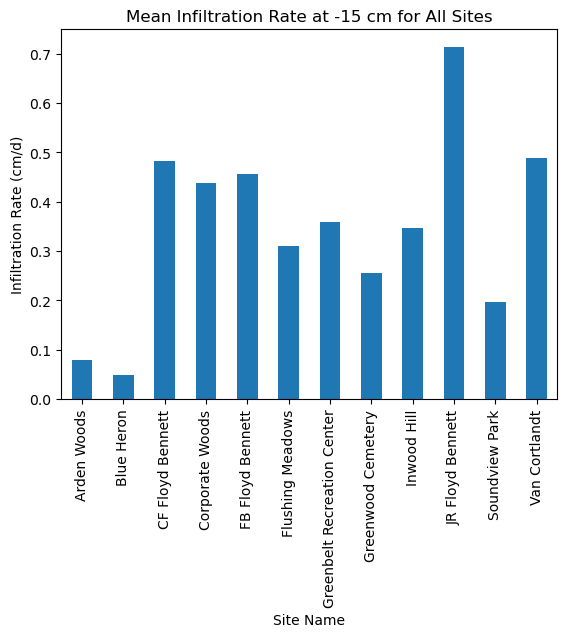

In [93]:
totalmean_15 = df.groupby('SITE_NAME')['-15_KUNSAT'].mean().plot(kind='bar')
plt.title('Mean Infiltration Rate at -15 cm for All Sites')
plt.ylabel('Infiltration Rate (cm/d)')
plt.xlabel('Site Name')

Text(0.5, 0, 'Site Name')

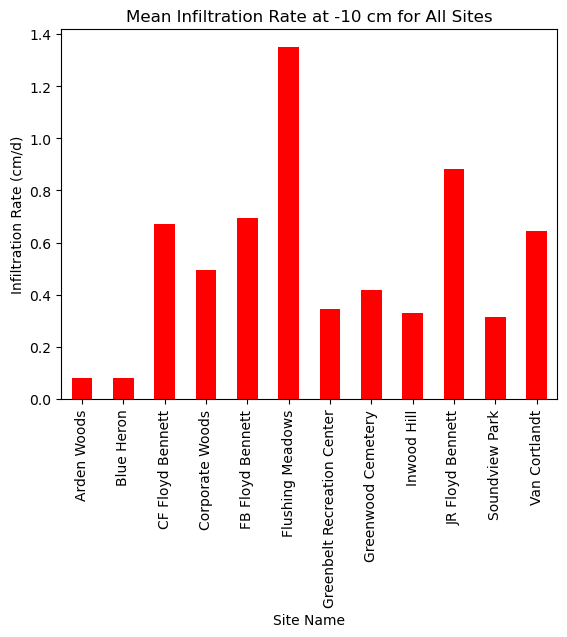

In [94]:
totalmean_10 = df.groupby('SITE_NAME')['-10_KUNSAT'].mean().plot(kind='bar', color='red')
plt.title('Mean Infiltration Rate at -10 cm for All Sites')
plt.ylabel('Infiltration Rate (cm/d)')
plt.xlabel('Site Name')

Text(0.5, 0, 'Site Name')

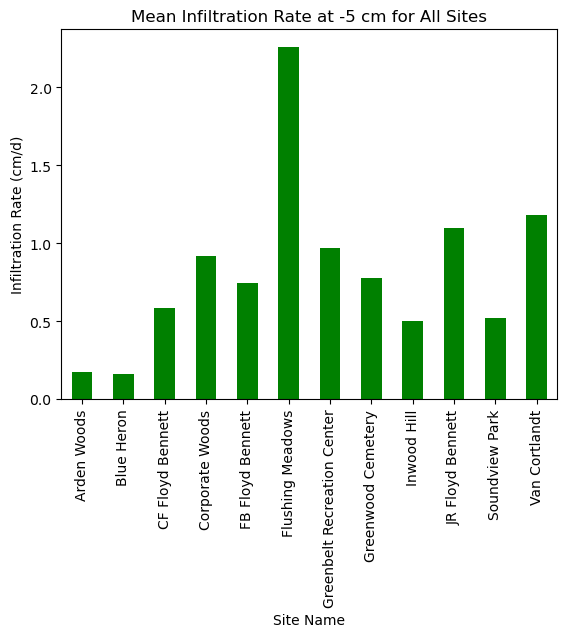

In [96]:
totalmean_5 = df.groupby('SITE_NAME')['-5_KUNSAT'].mean().plot(kind='bar', color='green')
plt.title('Mean Infiltration Rate at -5 cm for All Sites')
plt.ylabel('Infiltration Rate (cm/d)')
plt.xlabel('Site Name')

#### c. What are the top five sites with the largest infiltration for tensions -15, -10, and -5 cm?

In [59]:
mlargest_15 = totalmean_15.nlargest(5)
mlargest_10 = totalmean_10.nlargest(5)
mlargest_5 = totalmean_5.nlargest(5)
print(mlargest_15, mlargest_10, mlargest_5)

SITE_NAME
JR Floyd Bennett    0.713333
Van Cortlandt       0.487778
CF Floyd Bennett    0.481538
FB Floyd Bennett    0.456667
Corporate Woods     0.437500
Name: -15_KUNSAT, dtype: float64 SITE_NAME
Flushing Meadows    1.350000
JR Floyd Bennett    0.882500
FB Floyd Bennett    0.695333
CF Floyd Bennett    0.670000
Van Cortlandt       0.642778
Name: -10_KUNSAT, dtype: float64 SITE_NAME
Flushing Meadows               2.260000
Van Cortlandt                  1.178333
JR Floyd Bennett               1.094545
Greenbelt Recreation Center    0.967333
Corporate Woods                0.920000
Name: -5_KUNSAT, dtype: float64


#### Van Cortlandt and JR Floyd Bennett seem to consistently have much faster infiltration rates at each tension 

#### d. We can do the same for the lowest infiltration rates

In [61]:
msmallest_15 = totalmean_15.nsmallest(5)
msmallest_10 = totalmean_10.nsmallest(5)
msmallest_5 = totalmean_5.nsmallest(5)
print(msmallest_15, msmallest_10, msmallest_5)

SITE_NAME
Blue Heron            0.048571
Arden Woods           0.078667
Soundview Park        0.196667
Greenwood Cemetery    0.254667
Flushing Meadows      0.310000
Name: -15_KUNSAT, dtype: float64 SITE_NAME
Blue Heron                     0.080000
Arden Woods                    0.081333
Soundview Park                 0.312667
Inwood Hill                    0.331176
Greenbelt Recreation Center    0.344667
Name: -10_KUNSAT, dtype: float64 SITE_NAME
Blue Heron          0.157143
Arden Woods         0.172667
Inwood Hill         0.503529
Soundview Park      0.520667
CF Floyd Bennett    0.585385
Name: -5_KUNSAT, dtype: float64


#### Blue Heron and Arden Woods have the slowest infiltration rates 
These relationships are based on texture (sand, silt, and clay percentage) as well as pore size distribution which can be analyzed once texture measurements are collected
From basic understanding, we can assume that the fastest infiltration rates contain more sand% and the lowest contain more clay%. 

This is because sand allows more water to pass through the soil matrix faster and clay prevents water from entering the soil. 

However, once water enters a clay soil, particles may hold water very tightly making it harder for plants to use it!

### VI. Understanding Infiltration Rates Visually 

In [ ]:
###

### Plotting Each Infiltration Trend With Depth for all Sites

In [ ]:
## Defining each site data frame 

In [159]:
gb = df.groupby(['SITE_NAME'])
AW = gb.get_group(('Arden Woods'))
INW = gb.get_group(('Inwood Hill'))
BH = gb.get_group(('Blue Heron'))
SV = gb.get_group(('Soundview Park'))
VC = gb.get_group(('Van Cortlandt'))
GB = gb.get_group(('Greenbelt Recreation Center'))
GC = gb.get_group(('Greenwood Cemetery'))
CW = gb.get_group(('Corporate Woods'))
JR = gb.get_group(('JR Floyd Bennett'))
CF = gb.get_group(('CF Floyd Bennett'))
FB = gb.get_group(('FB Floyd Bennett'))

In [105]:
depth_ls = ['-15','-10','-5']
station_ls = df['SITE_NAME'].unique()
for depth in depth_ls:
    for station in station_ls:
        print(f'{depth}_KUNSAT')
        df_sub = gb.get_group(station)
        break
    break

-15_KUNSAT


In [101]:
df_sub

,SITE_NAME,ID,REPLICATE,DEPTH_CM,DEPTH_RANGE,KUNSAT_15cm,-10_KUNSAT,-5_KUNSAT
0,Arden Woods,AW,a,1,1-5,0.37,0.42,0.65
1,Arden Woods,AW,a,5,5-25,0.05,0.21,1.13
2,Arden Woods,AW,a,25,25-39,0.16,0.08,0.05
3,Arden Woods,AW,a,39,39-56,0.08,0.06,0.04
4,Arden Woods,AW,a,56,56-106,0.03,0.04,0.06
5,Arden Woods,AW,b,1,1-5,0.11,0.13,0.36
6,Arden Woods,AW,b,5,5-25,0.03,0.03,0.04
7,Arden Woods,AW,b,25,25-39,0.02,0.03,0.02
8,Arden Woods,AW,b,39,39-56,0.06,0.04,0.03
9,Arden Woods,AW,b,56,56-106,0.02,0.02,0.02


<Figure size 640x480 with 0 Axes>

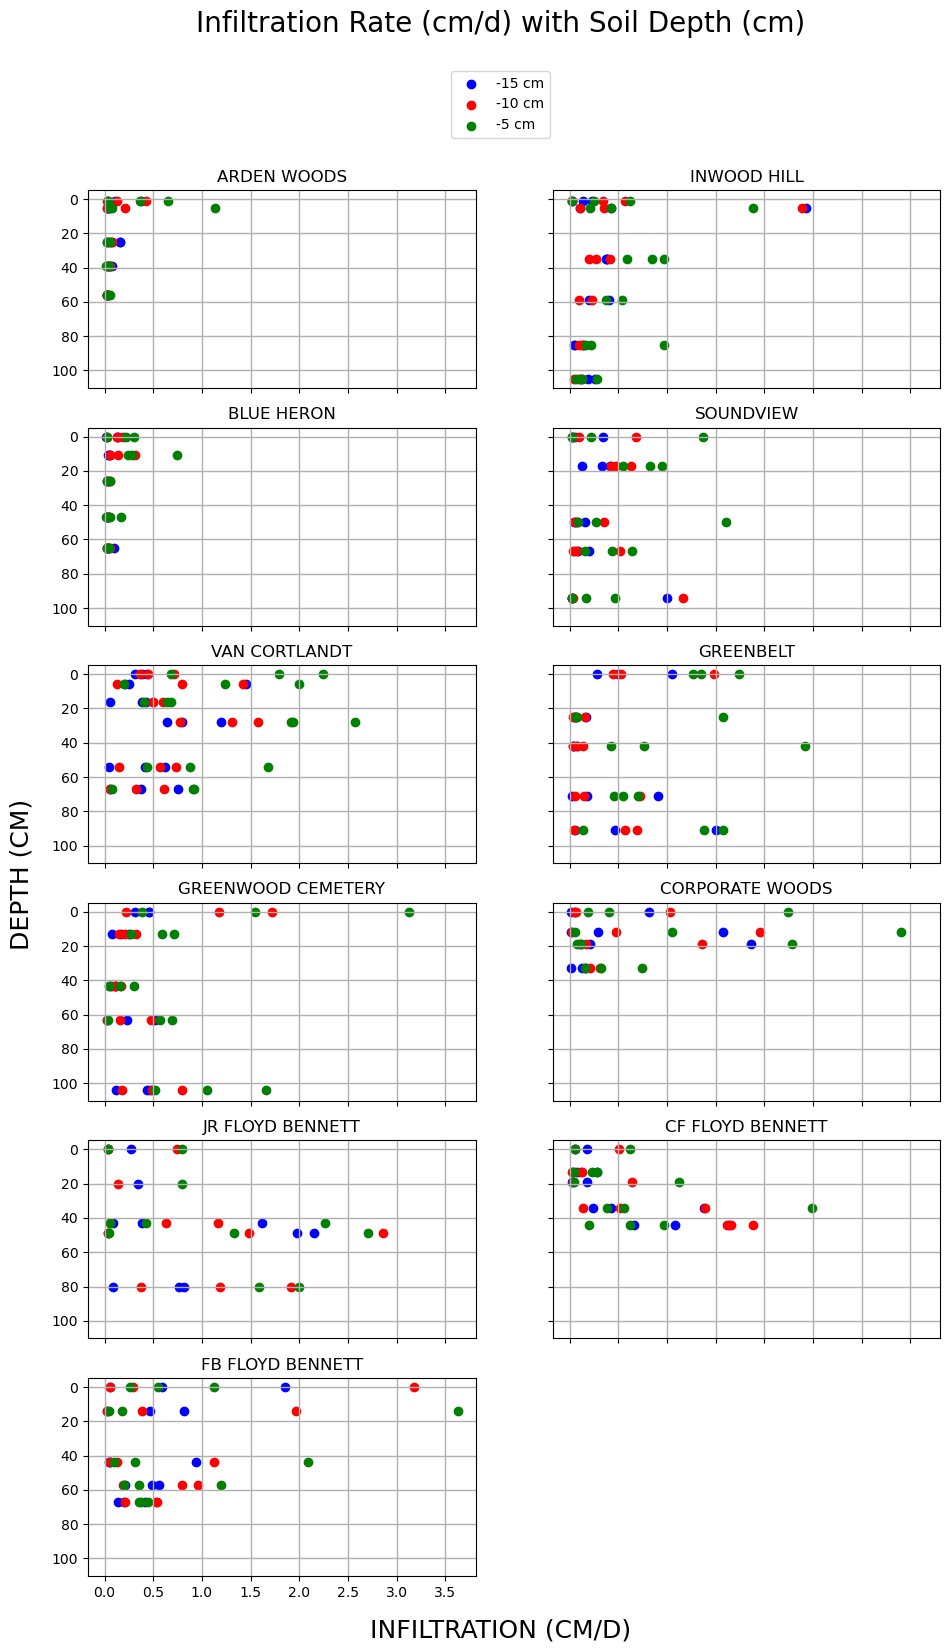

In [52]:
f = plt.figure()
f, ax = plt.subplots(figsize=(11,18),nrows = 6, ncols = 2, sharex=True, sharey=True)

##Plotting each infiltration tension with depth for each New York site 
ax[0,0].scatter(AW['-15_KUNSAT'], AW['DEPTH_CM'] , color='blue', marker='o')
ax[0,0].scatter(AW['-10_KUNSAT'], AW['DEPTH_CM'], color='red', marker='o') 
ax[0,0].scatter(AW['-5_KUNSAT'], AW['DEPTH_CM'], color='green', marker='o') 
ax[0,0].set_title('ARDEN WOODS')
ax[0,0].grid(which = 'major', linewidth=1)

ax[0,1].scatter(INW['-15_KUNSAT'], INW['DEPTH_CM'] , color='blue', marker='o') 
ax[0,1].scatter(INW['-10_KUNSAT'], INW['DEPTH_CM'], color='red', marker='o') 
ax[0,1].scatter(INW['-5_KUNSAT'], INW['DEPTH_CM'], color='green', marker='o') 
ax[0,1].set_title('INWOOD HILL')
ax[0,1].grid(which = 'major', linewidth=1)

ax[1,0].scatter(BH['-15_KUNSAT'], BH['DEPTH_CM'] , color='blue', marker='o') 
ax[1,0].scatter(BH['-10_KUNSAT'], BH['DEPTH_CM'], color='red', marker='o') 
ax[1,0].scatter(BH['-5_KUNSAT'], BH['DEPTH_CM'], color='green', marker='o') 
ax[1,0].set_title('BLUE HERON')
ax[1,0].grid(which = 'major', linewidth=1)

ax[1,1].scatter(SV['-15_KUNSAT'], SV['DEPTH_CM'] , color='blue', marker='o') 
ax[1,1].scatter(SV['-10_KUNSAT'], SV['DEPTH_CM'], color='red', marker='o') 
ax[1,1].scatter(SV['-5_KUNSAT'], SV['DEPTH_CM'], color='green', marker='o') 
ax[1,1].set_title('SOUNDVIEW')
ax[1,1].grid(which = 'major', linewidth=1)

ax[2,0].scatter(VC['-15_KUNSAT'], VC['DEPTH_CM'] , color='blue', marker='o') 
ax[2,0].scatter(VC['-10_KUNSAT'], VC['DEPTH_CM'], color='red', marker='o') 
ax[2,0].scatter(VC['-5_KUNSAT'], VC['DEPTH_CM'], color='green', marker='o') 
ax[2,0].set_title('VAN CORTLANDT')
ax[2,0].grid(which = 'major', linewidth=1)

ax[2,1].scatter(GB['-15_KUNSAT'], GB['DEPTH_CM'] , color='blue', marker='o') 
ax[2,1].scatter(GB['-10_KUNSAT'], GB['DEPTH_CM'], color='red', marker='o') 
ax[2,1].scatter(GB['-5_KUNSAT'], GB['DEPTH_CM'], color='green', marker='o') 
ax[2,1].set_title('GREENBELT')
ax[2,1].grid(which = 'major', linewidth=1)

ax[3,0].scatter(GC['-15_KUNSAT'], GC['DEPTH_CM'] , color='blue', marker='o') 
ax[3,0].scatter(GC['-10_KUNSAT'], GC['DEPTH_CM'], color='red', marker='o') 
ax[3,0].scatter(GC['-5_KUNSAT'], GC['DEPTH_CM'], color='green', marker='o') 
ax[3,0].set_title('GREENWOOD CEMETERY')
ax[3,0].grid(which = 'major', linewidth=1)

ax[3,1].scatter(CW['-15_KUNSAT'], CW['DEPTH_CM'] , color='blue', marker='o') 
ax[3,1].scatter(CW['-10_KUNSAT'], CW['DEPTH_CM'], color='red', marker='o') 
ax[3,1].scatter(CW['-5_KUNSAT'], CW['DEPTH_CM'], color='green', marker='o') 
ax[3,1].set_title('CORPORATE WOODS')
ax[3,1].grid(which = 'major', linewidth=1)

ax[4,0].scatter(JR['-15_KUNSAT'], JR['DEPTH_CM'] , color='blue', marker='o') 
ax[4,0].scatter(JR['-10_KUNSAT'], JR['DEPTH_CM'], color='red', marker='o') 
ax[4,0].scatter(JR['-5_KUNSAT'], JR['DEPTH_CM'], color='green', marker='o') 
ax[4,0].set_title('JR FLOYD BENNETT')
ax[4,0].grid(which = 'major', linewidth=1)

ax[4,1].scatter(CF['-15_KUNSAT'], CF['DEPTH_CM'] , color='blue', marker='o') 
ax[4,1].scatter(CF['-10_KUNSAT'], CF['DEPTH_CM'], color='red', marker='o') 
ax[4,1].scatter(CF['-5_KUNSAT'], CF['DEPTH_CM'], color='green', marker='o') 
ax[4,1].set_title('CF FLOYD BENNETT')
ax[4,1].grid(which = 'major', linewidth=1)

ax[5,0].scatter(FB['-15_KUNSAT'], FB['DEPTH_CM'] , color='blue', marker='o') 
ax[5,0].scatter(FB['-10_KUNSAT'], FB['DEPTH_CM'], color='red', marker='o') 
ax[5,0].scatter(FB['-5_KUNSAT'], FB['DEPTH_CM'], color='green', marker='o') 
ax[5,0].set_title('FB FLOYD BENNETT')
ax[5,0].grid(which = 'major', linewidth=1)

## Refining some figure details 
ax[5,1].set_visible(False)
f.text(0.5, 0.080, 'INFILTRATION (CM/D)', va='center', ha='center', fontsize=18)
f.text(0.065, 0.5, 'DEPTH (CM)', va='center', ha='center', rotation='vertical', fontsize=18)
plt.gca().invert_yaxis()
f.suptitle('Infiltration Rate (cm/d) with Soil Depth (cm)', fontsize=20) 
labels=(['-15 cm', '-10 cm', '-5 cm'])
f.legend(labels, loc='upper center', bbox_to_anchor=(0.5,0.95)) 